In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
dataset=pd.read_csv('Credit_Approval.csv')

In [3]:
dataset.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,1,f,g.1,202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
1,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,+


In [4]:
#Giving names to the variables.
dataset=pd.read_csv('Credit_Approval.csv', names = ['Gender', 'Age', 'AmountOwed(%)', 'AccountType', 'FamilyStatus', 'ResidenceCity', 'OccupationType', 
              'YearsEmployed', 'OwnedOnePreviously', 'OwnProperty', 'AccountLength', 'Citizen', 'HousingType',
             'CreditScore', 'MonthlyIncome', 'Approved'])

In [5]:
dataset.head()

,Gender,Age,AmountOwed(%),AccountType,FamilyStatus,ResidenceCity,OccupationType,YearsEmployed,OwnedOnePreviously,OwnProperty,AccountLength,Citizen,HousingType,CreditScore,MonthlyIncome,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [6]:
#Description of the dataset
dataset.describe(include = "all")

,Gender,Age,AmountOwed(%),AccountType,FamilyStatus,ResidenceCity,OccupationType,YearsEmployed,OwnedOnePreviously,OwnProperty,AccountLength,Citizen,HousingType,CreditScore,MonthlyIncome,Approved
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,0,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [7]:
#Changing values of the categorical variables

dataset['Gender']=dataset['Gender'].replace(['a','b'],[0,1])
dataset['AccountType']=dataset['AccountType'].replace(['u','y','l'],['Checking','Savings','Student'])
dataset['FamilyStatus']=dataset['FamilyStatus'].replace(['g','p','gg'],['Single','Married','Divorced'])
dataset['ResidenceCity']=dataset['ResidenceCity'].replace(['c','d','cc','i','j','k','m','r','q','w','x','e','aa','ff'],
                        ['Manchester', 'London', 'Birmingham', 'Derby', 'Chichester', 'Leicester', 'Salford', 
                         'Sheffield', 'York', 'Oxford', 'Bristol', 'Exeter', 'Preston', 'Other'])
dataset['OccupationType']=dataset['OccupationType'].replace(['v','h','bb','j','n','z','dd','ff','o'],
                            ['Data Scientist', 'Security Staff', 'Accountant', 'Doctor', 'Sale Staff', 'Manager', 
                             'Labourer', 'Entrepreneur', 'Other'])
dataset['OwnedOnePreviously']=dataset['OwnedOnePreviously'].replace(['t','f'],[0,1])
dataset['OwnProperty']=dataset['OwnProperty'].replace(['t','f'],[0,1])
dataset['Citizen']=dataset['Citizen'].replace(['t','f'],[0,1])
dataset['HousingType']=dataset['HousingType'].replace(['g','p','s'],['House','Apartment','Shared Accomodation'])
dataset['Approved']=dataset['Approved'].replace(['+','-'],[0,1])

In [8]:
dataset.head()

,Gender,Age,AmountOwed(%),AccountType,FamilyStatus,ResidenceCity,OccupationType,YearsEmployed,OwnedOnePreviously,OwnProperty,AccountLength,Citizen,HousingType,CreditScore,MonthlyIncome,Approved
0,1,30.83,0.000,Checking,Single,Oxford,Data Scientist,1.25,0,0,1,1,House,202,0,0
1,0,58.67,4.460,Checking,Single,York,Security Staff,3.04,0,0,6,1,House,43,560,0
2,0,24.5,0.500,Checking,Single,York,Security Staff,1.50,0,1,0,1,House,280,824,0
3,1,27.83,1.540,Checking,Single,Oxford,Data Scientist,3.75,0,0,5,0,House,100,3,0
4,1,20.17,5.625,Checking,Single,Oxford,Data Scientist,1.71,0,1,0,1,Shared Accomodation,120,0,0


In [9]:
#Checking which columns contain null values
dataset.isin(['?']).any()

Gender                 True
Age                    True
AmountOwed(%)         False
AccountType            True
FamilyStatus           True
ResidenceCity          True
OccupationType         True
YearsEmployed         False
OwnedOnePreviously    False
OwnProperty           False
AccountLength         False
Citizen               False
HousingType           False
CreditScore            True
MonthlyIncome         False
Approved              False
dtype: bool

In [10]:
dataset=pd.read_csv('Credit_Approval.csv', names = ['Gender', 'Age', 'AmountOwed(%)', 'AccountType', 'FamilyStatus', 'ResidenceCity', 'OccupationType', 
              'YearsEmployed', 'OwnedOnePreviously', 'OwnProperty', 'AccountLength', 'Citizen', 'HousingType',
             'CreditScore', 'MonthlyIncome', 'Approved'], na_values='?')

In [11]:
dataset.isnull().sum()

Gender                12
Age                   12
AmountOwed(%)          0
AccountType            6
FamilyStatus           6
ResidenceCity          9
OccupationType         9
YearsEmployed          0
OwnedOnePreviously     0
OwnProperty            0
AccountLength          0
Citizen                0
HousingType            0
CreditScore           13
MonthlyIncome          0
Approved               0
dtype: int64

In [12]:
#Changing the type of credit score
dataset['CreditScore'] = dataset['CreditScore'].astype(float)

In [13]:
#Treating the missing values
from sklearn.impute import SimpleImputer
numImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numImputer = numImputer.fit(dataset[['Age','CreditScore']])
dataset[['Age','CreditScore']] = numImputer.transform(dataset[['Age','CreditScore']])
catImputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
catImputer = catImputer.fit(dataset[['Gender','AccountType','FamilyStatus','ResidenceCity','OccupationType']])
dataset[['Gender','AccountType','FamilyStatus','ResidenceCity','OccupationType']] = catImputer.transform(dataset[['Gender','AccountType','FamilyStatus','ResidenceCity','OccupationType']])

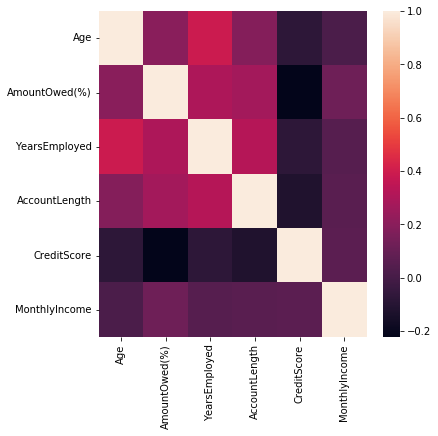

In [14]:
#Visualisations of numerical values
plt.figure(figsize=(6,6))
sns.heatmap(data=dataset.corr())

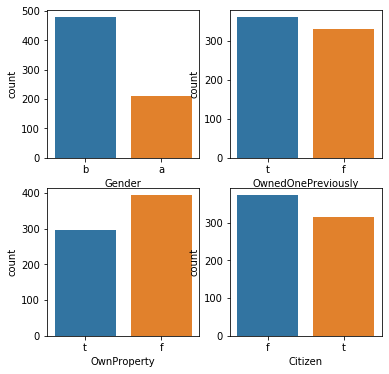

In [15]:
#Visualisation of the Nominal Variables
fig, ax = plt.subplots(2,2,figsize= (6,6))
sns.countplot(x=dataset['Gender'], ax=ax[0,0])
sns.countplot(x=dataset['OwnedOnePreviously'], ax=ax[0,1])
sns.countplot(x=dataset['OwnProperty'], ax=ax[1,0])
sns.countplot(x=dataset['Citizen'], ax=ax[1,1])

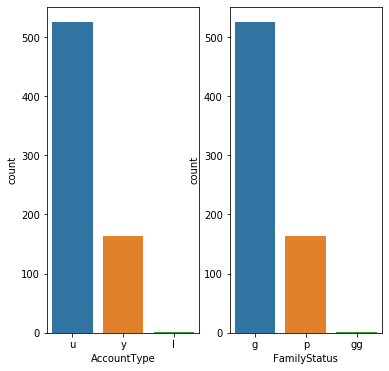

In [16]:
#Visualisation of the Categorical Variables
fig, ax = plt.subplots(1,2,figsize= (6,6))
sns.countplot(x=dataset['AccountType'], ax=ax[0])
sns.countplot(x=dataset['FamilyStatus'], ax=ax[1])

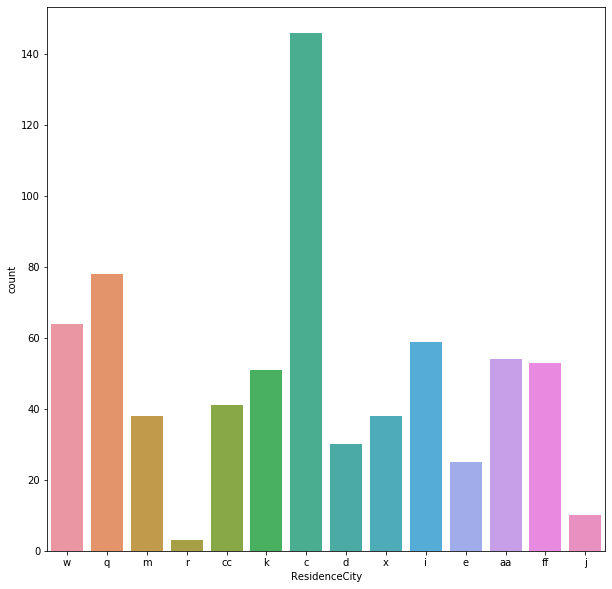

In [17]:
plt.figure(figsize= (10,10))
sns.countplot(x=dataset['ResidenceCity'])

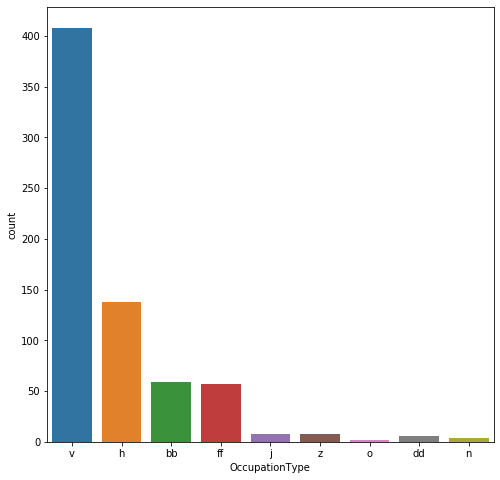

In [18]:
plt.figure(figsize= (8,8))
sns.countplot(x=dataset['OccupationType'])

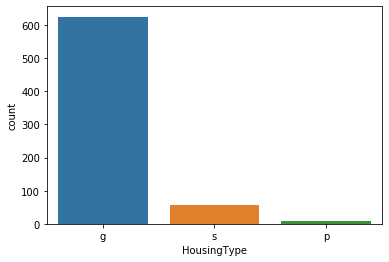

In [19]:
sns.countplot(x=dataset['HousingType'])

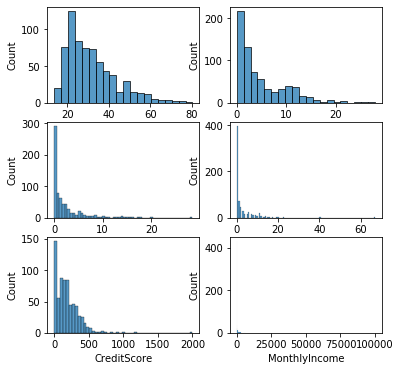

In [20]:
#Visualisation of Numerical Variables
fig, ax = plt.subplots(3,2,figsize= (6,6))
sns.histplot(x=dataset['Age'], ax=ax[0,0])
sns.histplot(x=dataset['AmountOwed(%)'], ax=ax[0,1])
sns.histplot(x=dataset['YearsEmployed'], ax=ax[1,0])
sns.histplot(x=dataset['AccountLength'], ax=ax[1,1])
sns.histplot(x=dataset['CreditScore'], ax=ax[2,0])
sns.histplot(x=dataset['MonthlyIncome'], ax=ax[2,1])

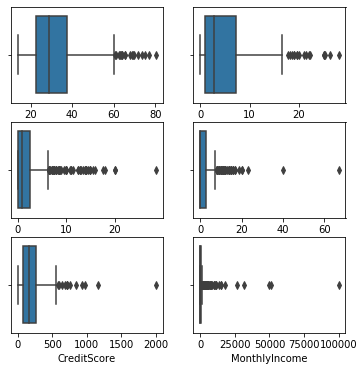

In [21]:
#Boxplot for Numerical Values
fig, ax = plt.subplots(3,2,figsize= (6,6))
sns.boxplot(x=dataset['Age'], ax=ax[0,0])
sns.boxplot(x=dataset['AmountOwed(%)'], ax=ax[0,1])
sns.boxplot(x=dataset['YearsEmployed'], ax=ax[1,0])
sns.boxplot(x=dataset['AccountLength'], ax=ax[1,1])
sns.boxplot(x=dataset['CreditScore'], ax=ax[2,0])
sns.boxplot(x=dataset['MonthlyIncome'], ax=ax[2,1])

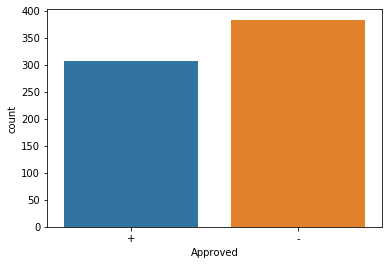

In [22]:
#checking for the class imbalance
sns.countplot(x=dataset['Approved'])

In [23]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in dataset.columns:
    if dataset[col].dtypes == object:
        dataset[col]= le.fit_transform(dataset[col])

In [24]:
#Splitting dataset
X = dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values
y = dataset.iloc[:, 15].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state= 0)

In [25]:
#standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.fit_transform(X_test)

In [26]:
#Building the Model using Logistic Regression

from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()
LogReg.fit(X_train_s,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = LogReg.predict(X_test_s)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0])

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        91
           1       0.91      0.82      0.86       117

    accuracy                           0.85       208
   macro avg       0.85      0.86      0.85       208
weighted avg       0.86      0.85      0.85       208

[[81 10]
 [21 96]]


In [29]:
# Get the accuracy score of logreg model and print it
print("Test: Accuracy = ", LogReg.score(X_test_s,y_test))
print("Train: Accuracy = ", LogReg.score(X_train_s,y_train))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)

Test: Accuracy =  0.8509615384615384
Train: Accuracy =  0.8755186721991701


array([[81, 10],
       [21, 96]])

In [30]:
#Building the Model using Neural Network
import tensorflow as tf

In [31]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(9,activation='relu',input_shape=(15,))) 
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))

In [32]:
#compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 144       
                                                                 
 dense_1 (Dense)             (None, 2)                 20        
                                                                 
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________


In [33]:
NeuNet = model.fit(X_train_s, y_train, batch_size = 8, epochs= 50, verbose=2, validation_split=0.3)

Epoch 1/50
43/43 - 1s - loss: 1.0251 - accuracy: 0.4214 - val_loss: 0.9425 - val_accuracy: 0.5103 - 1s/epoch - 24ms/step
Epoch 2/50
43/43 - 0s - loss: 0.8362 - accuracy: 0.4748 - val_loss: 0.7980 - val_accuracy: 0.5517 - 160ms/epoch - 4ms/step
Epoch 3/50
43/43 - 0s - loss: 0.7131 - accuracy: 0.5727 - val_loss: 0.6895 - val_accuracy: 0.6069 - 183ms/epoch - 4ms/step
Epoch 4/50
43/43 - 0s - loss: 0.6238 - accuracy: 0.6588 - val_loss: 0.6180 - val_accuracy: 0.6483 - 163ms/epoch - 4ms/step
Epoch 5/50
43/43 - 0s - loss: 0.5568 - accuracy: 0.7181 - val_loss: 0.5636 - val_accuracy: 0.6966 - 212ms/epoch - 5ms/step
Epoch 6/50
43/43 - 0s - loss: 0.5037 - accuracy: 0.7774 - val_loss: 0.5210 - val_accuracy: 0.7310 - 355ms/epoch - 8ms/step
Epoch 7/50
43/43 - 0s - loss: 0.4625 - accuracy: 0.8131 - val_loss: 0.4911 - val_accuracy: 0.7862 - 188ms/epoch - 4ms/step
Epoch 8/50
43/43 - 0s - loss: 0.4308 - accuracy: 0.8398 - val_loss: 0.4694 - val_accuracy: 0.7931 - 287ms/epoch - 7ms/step
Epoch 9/50
43/43 -

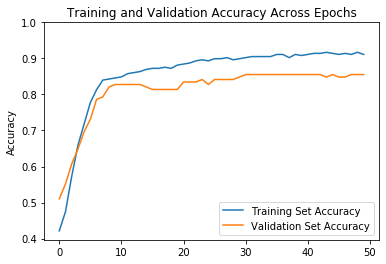

In [34]:
accuracy = NeuNet.history['accuracy'] 
validation_accuracy = NeuNet.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy') 
plt.plot(validation_accuracy, label='Validation Set Accuracy') 
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

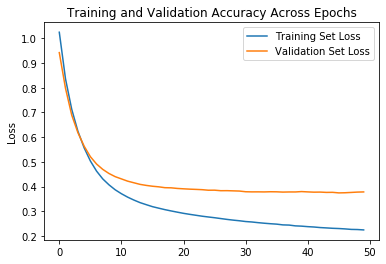

In [35]:
loss = NeuNet.history['loss'] 
validation_loss = NeuNet.history['val_loss']
plt.plot(loss, label='Training Set Loss') 
plt.plot(validation_loss, label='Validation Set Loss') 
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()

In [36]:
y_pred_NeuNet = model.predict(X_test_s) 
y_pred_NeuNet = y_pred_NeuNet.argmax(axis=1)

7/7 [==============================] - 0s 2ms/step


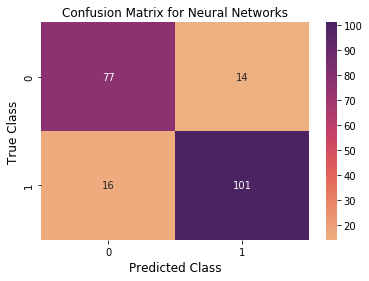

In [37]:
confusion_matrix_NeuNet = confusion_matrix(y_test,y_pred_NeuNet)
ax = sns.heatmap(confusion_matrix_NeuNet, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix for Neural Networks",fontsize=12)
plt.show()

In [38]:
print(classification_report(y_test,y_pred_NeuNet))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        91
           1       0.88      0.86      0.87       117

    accuracy                           0.86       208
   macro avg       0.85      0.85      0.85       208
weighted avg       0.86      0.86      0.86       208



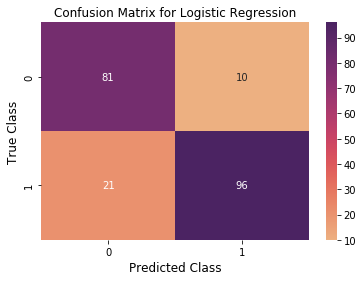

In [39]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix for Logistic Regression",fontsize=12)
plt.show()

In [40]:
print('Accuracy Score for Logistic Regression is {:.5}'.format(accuracy_score(y_test, y_pred)))
print('Accuracy Score for Neural Networks is {:.5}'.format(accuracy_score(y_test, y_pred_NeuNet)))

Accuracy Score for Logistic Regression is 0.85096
Accuracy Score for Neural Networks is 0.85577
